In [2]:
from pattern_analysis import *
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
data_filename='axicon_pattern_flower_with_power.csv'
# data_filename='space_time_7mm_40%_unique_with_power_and_ring_design.csv'
data = pd.read_csv(data_filename)

In [4]:
microlens_diameter=1.1
lens_Diameter=60
pupil_diameter=6
x_points=data['x']
y_points=data['y']
density=pattern_analysis(x_points,y_points,pupil_diameter,lens_Diameter,microlens_diameter)

In [5]:
def count_microlenses(centers, microlens_diameter, pupil_diameter, x, y,
    torrent=0.05):
    # Convert list of centers to numpy array
    centers = np.array(centers)

    # Calculate the distances from the point (x, y) to all microlens centers
    distances = np.sqrt(np.sum((centers - np.array([x, y]))**2, axis=1))

    # Check which microlenses are completely within the pupil diameter
    in_pupil = ((distances + microlens_diameter / 2  ) - (pupil_diameter / 2))<= torrent

    # Count the number of microlenses completely within the pupil diameter
    complete_microlenses = np.sum(in_pupil)

    return complete_microlenses

In [6]:
x = np.linspace(-lens_Diameter/2, lens_Diameter/2, 201)
y = np.linspace(-lens_Diameter/2, lens_Diameter/2, 201)
X, Y = np.meshgrid(x, y)
centers=np.array([x_points,y_points]).T
count_density = np.zeros_like(X)
# 计算密度
for i in range(X.shape[0]):
    for j in range(X.shape[1]):
        count_density[i,j] = count_microlenses(centers, microlens_diameter,pupil_diameter,X[i,j], Y[i,j],torrent=0)


In [7]:
t=0.1
R=microlens_diameter/2
h=np.sqrt(R**2-(R-t)**2)
S=np.pi*R**2
area=1/2*(2*np.arccos((R-t)/R))*R**2 - h*(R-t)
1-area / S 

0.9547575755662545

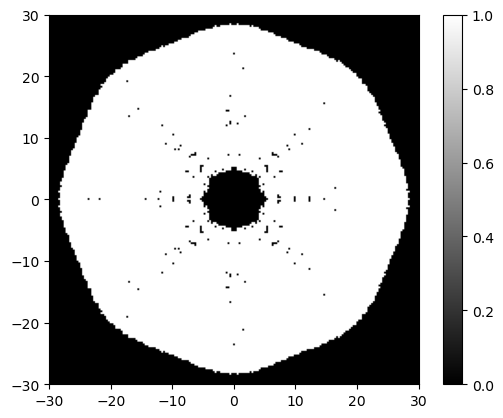

In [8]:
plt.imshow(count_density>=6, extent=[-lens_Diameter/2, lens_Diameter/2, -lens_Diameter/2, lens_Diameter/2],cmap='gray')
plt.colorbar()
plt.show()

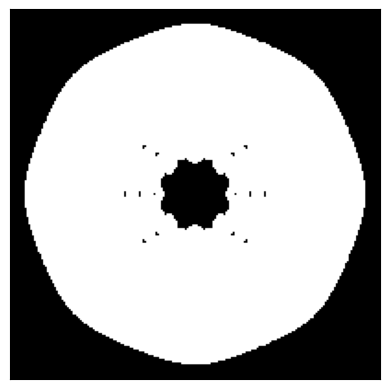

: 

In [10]:
plt.imshow(density>0.3, extent=[-lens_Diameter/2, lens_Diameter/2, -lens_Diameter/2, lens_Diameter/2],cmap='gray')
# plt.colorbar()
# 去除外框
plt.xticks([])
plt.yticks([])

plt.show()